# Box plots
> Used to detect outliers
> Gives more complete picture (distribution based on center and variability)

In [4]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.integrate import quad
from matplotlib.patches import Polygon , ConnectionPatch

%matplotlib inline

In [6]:
x = np.linspace(-4, 4, num = 100)
x

array([-4.        , -3.91919192, -3.83838384, -3.75757576, -3.67676768,
       -3.5959596 , -3.51515152, -3.43434343, -3.35353535, -3.27272727,
       -3.19191919, -3.11111111, -3.03030303, -2.94949495, -2.86868687,
       -2.78787879, -2.70707071, -2.62626263, -2.54545455, -2.46464646,
       -2.38383838, -2.3030303 , -2.22222222, -2.14141414, -2.06060606,
       -1.97979798, -1.8989899 , -1.81818182, -1.73737374, -1.65656566,
       -1.57575758, -1.49494949, -1.41414141, -1.33333333, -1.25252525,
       -1.17171717, -1.09090909, -1.01010101, -0.92929293, -0.84848485,
       -0.76767677, -0.68686869, -0.60606061, -0.52525253, -0.44444444,
       -0.36363636, -0.28282828, -0.2020202 , -0.12121212, -0.04040404,
        0.04040404,  0.12121212,  0.2020202 ,  0.28282828,  0.36363636,
        0.44444444,  0.52525253,  0.60606061,  0.68686869,  0.76767677,
        0.84848485,  0.92929293,  1.01010101,  1.09090909,  1.17171717,
        1.25252525,  1.33333333,  1.41414141,  1.49494949,  1.57

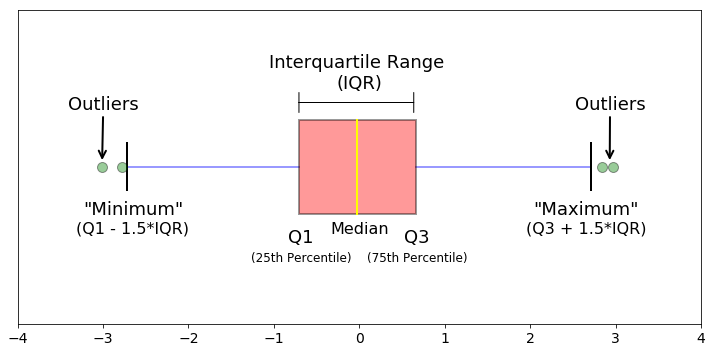

In [8]:
np.random.seed(916170)

mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))

# rectangular box plot
bplot = axes.boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   

axes.set_xlim(-4, 4)
plt.xticks(fontsize = 14)

axes.set_yticks([])
axes.annotate(r'',
            xy=(-.73, .205), xycoords='data',
            xytext=(.66, .205), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes.text(0, .25, "Interquartile Range \n(IQR)",  horizontalalignment='center', fontsize=18)
axes.text(0, -.21, r"Median", horizontalalignment='center', fontsize=16);
axes.text(2.65, -.15, "\"Maximum\"", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.15, "\"Minimum\"", horizontalalignment='center', fontsize=18);
axes.text(-.68, -.24, r"Q1", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.21, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16);
axes.text(.6745, -.24, r"Q3", horizontalalignment='center', fontsize=18);
axes.text(.6745, -.30, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(-.68, -.30, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(2.65, -.21, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);

axes.annotate('Outliers', xy=(2.93,0.015), xytext=(2.52,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

axes.annotate('Outliers', xy=(-3.01,0.015), xytext=(-3.41,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

fig.tight_layout()
fig.savefig('simple_boxplot.png', dpi = 2000)

In [9]:
((2 * .6745) * 1.5) + .6745

2.698

In [10]:
stuff = (2.65 - .6745) / 2
.6745 + stuff

1.6622499999999998

Whiskers
The part in blue are the whiskers

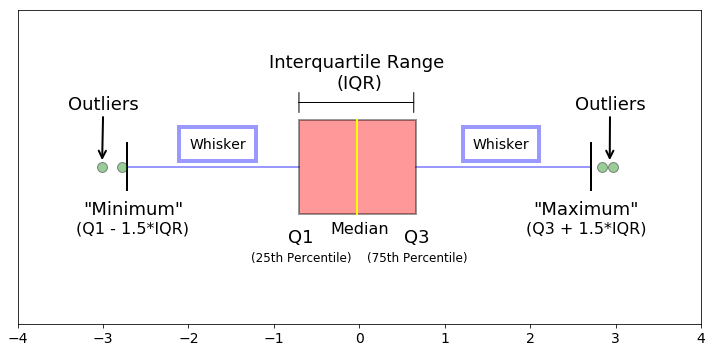

In [11]:
np.random.seed(916170)

# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))

# rectangular box plot
bplot = axes.boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   

axes.set_xlim(-4, 4)
plt.xticks(fontsize = 14)

axes.set_yticks([])
axes.annotate(r'',
            xy=(-.73, .205), xycoords='data',
            xytext=(.66, .205), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes.text(0, .25, "Interquartile Range \n(IQR)",  horizontalalignment='center', fontsize=18)
axes.text(0, -.21, r"Median", horizontalalignment='center', fontsize=16);
axes.text(2.65, -.15, "\"Maximum\"", horizontalalignment='center', fontsize=18);
#axes.text(-1.66, .03, "Whisker", horizontalalignment='center', fontsize=18);

axes.text(1.66, .06, r'Whisker', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white',
                  'edgecolor':'blue',
                  'linewidth': 4,
                  'alpha': .4,
                  'pad':10.0});

axes.text(-1.66, .06, r'Whisker', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white',
                  'edgecolor':'blue',
                  'linewidth': 4,
                  'alpha': .4,
                  'pad':10.0});

axes.text(-2.65, -.15, "\"Minimum\"", horizontalalignment='center', fontsize=18);
axes.text(-.68, -.24, r"Q1", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.21, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16);
axes.text(.6745, -.24, r"Q3", horizontalalignment='center', fontsize=18);
axes.text(.6745, -.30, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(-.68, -.30, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(2.65, -.21, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);

axes.annotate('Outliers', xy=(2.93,0.015), xytext=(2.52,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

axes.annotate('Outliers', xy=(-3.01,0.015), xytext=(-3.41,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

fig.tight_layout()
fig.savefig('simple_whisker.png', dpi = 900)

In [12]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

#Integrate PDF from -.6745 to .6745
result_n67_67, _ = quad(normalProbabilityDensity, -.6745, .6745, limit = 1000)

# Integrate PDF from -2.698 to -.6745
result_n2698_67, _ = quad(normalProbabilityDensity, -2.698, -.6745, limit = 1000)

# Integrate PDF from .6745 to 2.698
result_67_2698, _ = quad(normalProbabilityDensity, .6745, 2.698, limit = 1000)

# Integrate PDF from 2.698 to positive infinity
result_2698_inf, _ = quad(normalProbabilityDensity, 2.698, np.inf, limit = 1000)

# Integrate PDF from negative infinity to -2.698
result_ninf_n2698, _ = quad(normalProbabilityDensity, np.NINF, -2.698, limit = 1000)

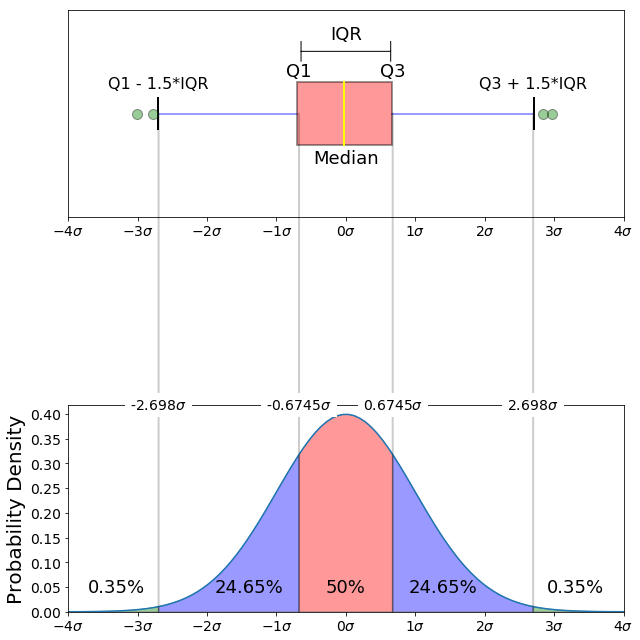

In [13]:
np.random.seed(916170)

# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(9, 9))

# rectangular box plot
bplot = axes[0].boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   



axes[0].set_xlim(-4, 4)
axes[0].set_yticks([])
x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)

axes[0].annotate(r'',
            xy=(-.6745, .30), xycoords='data',
            xytext=(.6745, .30), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes[0].text(0, .36, r"IQR",  horizontalalignment='center', fontsize=18)
axes[0].text(0, -.24, r"Median", horizontalalignment='center', fontsize=18);
axes[0].text(-.6745, .18, r"Q1", horizontalalignment='center', fontsize=18);
axes[0].text(-2.698, .12, r"Q1 - 1.5*IQR", horizontalalignment='center', fontsize=16);
axes[0].text(.6745, .18, r"Q3", horizontalalignment='center', fontsize=18);
axes[0].text(2.698, .12, r"Q3 + 1.5*IQR", horizontalalignment='center', fontsize=16);

axes[1].plot(x, pdf_normal_distribution, zorder= 2)
axes[1].set_xlim(-4, 4)
axes[1].set_ylim(0)
axes[1].set_ylabel('Probability Density', size = 20)

##############################
# lower box
con = ConnectionPatch(xyA=(-.6745, 0), xyB=(-.6745, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="black", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# upper box
con = ConnectionPatch(xyA=(.6745, 0), xyB=(.6745, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="black", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# lower whisker
con = ConnectionPatch(xyA=(-2.698, 0), xyB=(-2.698, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="black", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# upper whisker
con = ConnectionPatch(xyA=(2.698, 0), xyB=(2.698, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="black", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# Make the shaded center region to represent integral
a, b = -.6745, .6745
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(-.6745, 0)] + list(zip(ix, iy)) + [(.6745, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly)
axes[1].text(0, .04, r'{0:.0f}%'.format(result_n67_67*100),
         horizontalalignment='center', fontsize=18)

##############################
a, b = -2.698, -.6745# integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
axes[1].text(-1.40, .04, r'{0:.2f}%'.format(result_n2698_67*100),
         horizontalalignment='center', fontsize=18);

##############################
a, b = .6745, 2.698 # integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
axes[1].text(1.40, .04, r'{0:.2f}%'.format(result_67_2698*100),
         horizontalalignment='center', fontsize=18);

##############################
a, b = 2.698, 4 # integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
axes[1].text(3.3, .04, r'{0:.2f}%'.format(result_2698_inf*100),
         horizontalalignment='center', fontsize=18);

##############################
a, b = -4, -2.698 # integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
axes[1].text(-3.3, .04, r'{0:.2f}%'.format(result_ninf_n2698*100),
         horizontalalignment='center', fontsize=18);

##############################
xTickLabels = [r'$-4\sigma$',
               r'$-3\sigma$',
               r'$-2\sigma$',
               r'$-1\sigma$',
               r'$0\sigma$',
               r'$1\sigma$',
               r'$2\sigma$',
               r'$3\sigma$',
               r'$4\sigma$']

yTickLabels = ['0.00',
               '0.05',
               '0.10',
               '0.15',
               '0.20',
               '0.25',
               '0.30',
               '0.35',
               '0.40']

# Make both x axis into standard deviations
axes[0].set_xticklabels(xTickLabels, fontsize = 14)
axes[1].set_xticklabels(xTickLabels, fontsize = 14)

# Only the PDF needs y ticks
axes[1].set_yticklabels(yTickLabels, fontsize = 14)

##############################
# Add -2.698, -.6745, .6745, 2.698 text without background
axes[1].text(-.6745,.41, r'{0:.4f}'.format(-.6745) + '$\sigma$', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5});

axes[1].text(.6745, .410, r'{0:.4f}'.format(.6745) + '$\sigma$', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5});

axes[1].text(-2.698, .410, r'{0:.3f}'.format(-2.698) + '$\sigma$', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5});

axes[1].text(2.698, .410, r'{0:.3f}'.format(2.698) + '$\sigma$', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5});

fig.tight_layout()
fig.savefig('boxplotNormalDistributionOverlay.png', dpi = 900)

Probability Density Function

To be able to understand where the percentages come from in the 68-95-99.7 rule, it is important to know about the probability density function (PDF). A PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable’s PDF over that range — that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. This definition might not make much sense so let’s clear it up by graphing the probability density function for a normal distribution. The equation below is the probability density function for a normal distribution

Now that the function is simpler, let’s graph this function with a range from -4 to 4

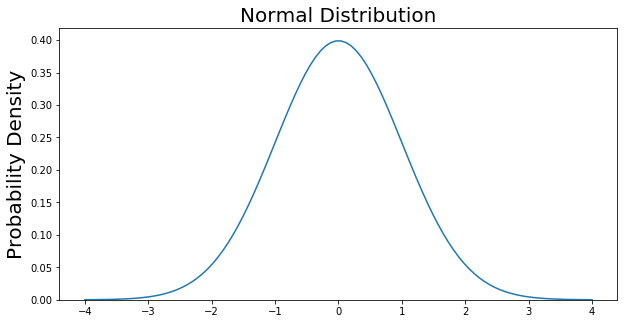

In [14]:
# Import all libraries for the rest of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);
fig.savefig('normalDistributionPDF.png', dpi = 900);

The graph above does not show you the probability of events but their probability density. To get the probability of an event within a given range we will need to integrate. Suppose we are interested in finding the probability of a random data point landing within 1 standard deviation of the mean, we need to integrate from -1 to 1. This can be done with SciPy.

In [15]:
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -2.698 to 2.698
result_99_3p, _ = quad(normalProbabilityDensity,
                     -2.698,
                     2.698,
                     limit = 1000)
print(result_99_3p)

0.9930242559336101


In [ ]:
a, b = -2.698, 2.698 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-2.698}^{2.698}f(x)\mathrm{d}x=$" + "{0:.1f}%".format(result_99_3p*100),
         horizontalalignment='center', fontsize=11.5);

ax.set_title(r'99.3% of Values are within 2.698 STD', fontsize = 24);
ax.set_ylabel(r'Probability Density', fontsize = 18);

fig.savefig('99_3.png', dpi = 1200)

Negative Infinity to Positive Infinity
For any PDF, the area under the curve must be 1

You will also find that it is also possible for observations to fall 4, 5 or even more standard deviations from the mean, but this is very rare if you have a normal or nearly normal distribution.

Boxplot Documentation Used
General boxplot documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

Changing Color of Boxplot: https://matplotlib.org/examples/statistics/boxplot_color_demo.html

Properties of a box plot: https://matplotlib.org/examples/statistics/boxplot_demo.html

How I plotted over multiple subplots: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs

Back No Border but have background for ax text: https://stackoverflow.com/questions/27531290/remove-matplotlib-text-plot-border